In [14]:
import pandas as pd
import numpy as np
from pylab import mpl
import matplotlib.pyplot as plt

In [15]:
filename = './data/medicine_data_ex.csv'
df_obj = pd.read_csv(filename)
print(df_obj)

     category                                             title   price  \
0        补肾壮阳               汇仁 肾宝片 126片 调和阴阳温阳补肾扶正固本 男女同补补肾中成药品   322.0   
1        补肾壮阳               汇仁 肾宝片 126片 肾虚肾亏补肾中药肾气丸滋阴壮阳 推荐2盒1疗程   322.0   
2       风湿骨外伤          白云山 陈李济 舒筋健腰丸45g*10瓶 补益肝肾 强健筋骨 驱风除湿 活络止痛   890.0   
3        补肾壮阳           同仁堂 六味地黄丸（浓缩丸）300丸 （男女肾虚肾亏中药品滋阴补肾）六味地黄丸    49.5   
4        补肾壮阳               汇仁 肾宝片礼盒装 126片*4盒礼盒装温阳补肾肾虚肾亏京东自营旗舰店  1188.0   
...       ...                                               ...     ...   
2875    耳鼻喉用药               逸舒 氯雷他定片6片 用于过敏性鼻炎 慢性荨麻疹 瘙痒性和过敏性皮肤病     3.9   
2876    耳鼻喉用药              仙特明 盐酸西替利嗪片10mg*5片/盒（季节性鼻炎,常年性过敏性鼻炎）    18.8   
2877    耳鼻喉用药                  希臣 铁笛片1g*24片 生津止渴 咽干口燥 声音嘶哑 咽喉肿痛    25.8   
2878    耳鼻喉用药                                  济民可信 金果饮15ml*10支    29.8   
2879    耳鼻喉用药  王屋山 复方冬凌草含片 每片重0.6克 疏风清热.解毒利咽.用于咽部干燥.灼热.疼痛症状的改善.    22.0   

        nums                                 name     brand symptoms      type  
0     400000      

# 数据清洗

## 查看数据信息

In [16]:
print(df_obj[df_obj['nums']==0])

     category                     title  price  nums  \
2390     儿科用药  伊可新 维生素AD滴剂(1岁以上)胶囊型 30粒   40.7     0   
2450     儿科用药  伊可新 维生素AD滴剂(1岁以上)胶囊型 30粒   40.7     0   
2510     儿科用药  伊可新 维生素AD滴剂(1岁以上)胶囊型 30粒   40.7     0   

                          name brand     symptoms  type  
2390  伊可新 维生素AD滴剂(1岁以上)胶囊型 30粒   伊可新  抽搐症，夜盲症，佝偻症  小儿维矿  
2450  伊可新 维生素AD滴剂(1岁以上)胶囊型 30粒   伊可新  抽搐症，夜盲症，佝偻症  小儿维矿  
2510  伊可新 维生素AD滴剂(1岁以上)胶囊型 30粒   伊可新  抽搐症，夜盲症，佝偻症  小儿维矿  


## 查看原始数据维度大小

In [17]:
print(df_obj.shape)

(2880, 8)


### 过滤销量为0的药品

In [18]:
df_obj =df_obj[df_obj['nums']>0]
print(df_obj.shape)

(2877, 8)


## 数据分析

### 统计不同类别药品数量

In [19]:
ser_size = df_obj.groupby('category').size()
print(ser_size)

category
儿科用药     269
妇科用药     190
心脑血管      10
感冒咳嗽     301
止痛镇痛      42
皮肤用药     425
维矿物质     236
耳鼻喉用药    187
肠胃消化     406
补气养血     260
补肾壮阳     309
风湿骨外伤    242
dtype: int64


<Figure size 1152x648 with 0 Axes>

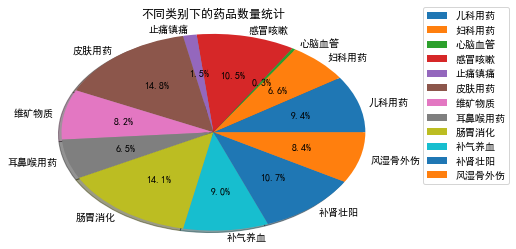

In [27]:
# 设置画布尺寸
plt.figure(figsize=(16,9))
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 避免中文乱码
fig,ax = plt.subplots(1)
ax.set_title('不同类别下的药品数量统计') #设置标题
ax.pie(ser_size,labels=ser_size.index,autopct='%3.1f%%',labeldistance=1.07,shadow=True,radius=1)
plt.legend(loc=1,bbox_to_anchor=(1.4,1.1)) #显示图例
plt.axis('tight') # 显示为椭圆
plt.savefig('./images/img_1.jpg')
plt.show()

## 统计不同类别药品最高和最低价格

In [28]:
ser_max_price = df_obj.groupby('category').max()['price']
ser_min_price = df_obj.groupby('category').min()['price']
print(ser_max_price)
print(ser_min_price)

category
儿科用药      298.0
妇科用药      387.0
心脑血管      790.0
感冒咳嗽      298.0
止痛镇痛       30.2
皮肤用药      398.0
维矿物质      285.0
耳鼻喉用药      75.0
肠胃消化      327.0
补气养血     2198.0
补肾壮阳     1380.0
风湿骨外伤    1290.0
Name: price, dtype: float64
category
儿科用药       9.9
妇科用药       7.9
心脑血管     585.0
感冒咳嗽       9.6
止痛镇痛       8.9
皮肤用药      10.0
维矿物质       5.8
耳鼻喉用药      3.9
肠胃消化       9.9
补气养血      18.0
补肾壮阳      12.8
风湿骨外伤      5.0
Name: price, dtype: float64


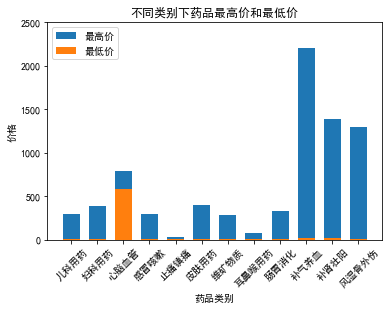

In [37]:
fig,ax = plt.subplots(1)
# 横坐标
x = np.arange(len(ser_max_price))
# 柱形宽度
width = 0.65
ax.bar(x,ser_max_price,width,label='最高价')
ax.bar(x,ser_min_price,width,label='最低价')
# 标题
ax.set_title('不同类别下药品最高价和最低价')
# 水平和垂直轴标签
ax.set_xlabel('药品类别')
ax.set_ylabel('价格')
# 水平轴刻度标签显示的位置
ax.set_xticks(x) # 设置x轴显示位置
ax.set_xticklabels(ser_max_price.index,rotation=45)  # 设置水平轴刻度标签
ax.set_yticks(np.arange(0,3000,500))  # 设置y轴刻度位置
ax.legend(loc='best')
plt.savefig('./images/img2.png')  # 存储图片
plt.show()

### 不同类别药品价格分布

Index(['儿科用药', '妇科用药', '心脑血管', '感冒咳嗽', '止痛镇痛', '皮肤用药', '维矿物质', '耳鼻喉用药', '肠胃消化',
       '补气养血', '补肾壮阳', '风湿骨外伤'],
      dtype='object', name='category')


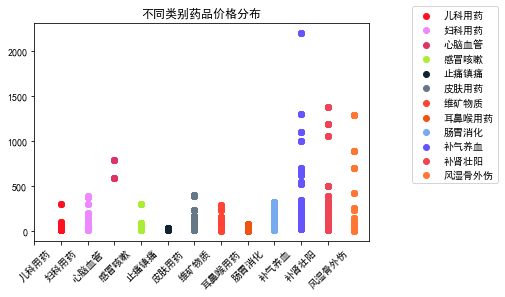

In [36]:
# 按照类别对价格进行分组
df_group = df_obj.groupby('category')['price']
colors = ['#ff1122','#ee88ff','#dd3366','#aaee33','#112233','#667788','#ff4433','#ee5511','#77aaee','#6655ff','#ee4455','#ff7733']
labels = ser_max_price.index
# print(labels)
fig,ax = plt.subplots(1)
# 设置标题
ax.set_title('不同类别药品价格分布')
i = 0
for name,value in df_group:
    label = labels[i]
    color = colors[i]
    x = np.ones(len(value)) * (i+1)
    ax.scatter(x,value,color=color,label=label,marker='o')
    i+=1
# 设置刻度显示位置
ax.set_xticks(np.arange(len(labels)))
# 设置刻度标签
ax.set_xticklabels(labels,rotation=45)
ax.legend(loc=1,bbox_to_anchor=(1.4,1.1)) # 显示图例
plt.savefig('./images/img_3.png')
plt.show()

## 统计不同类别价格分布区间

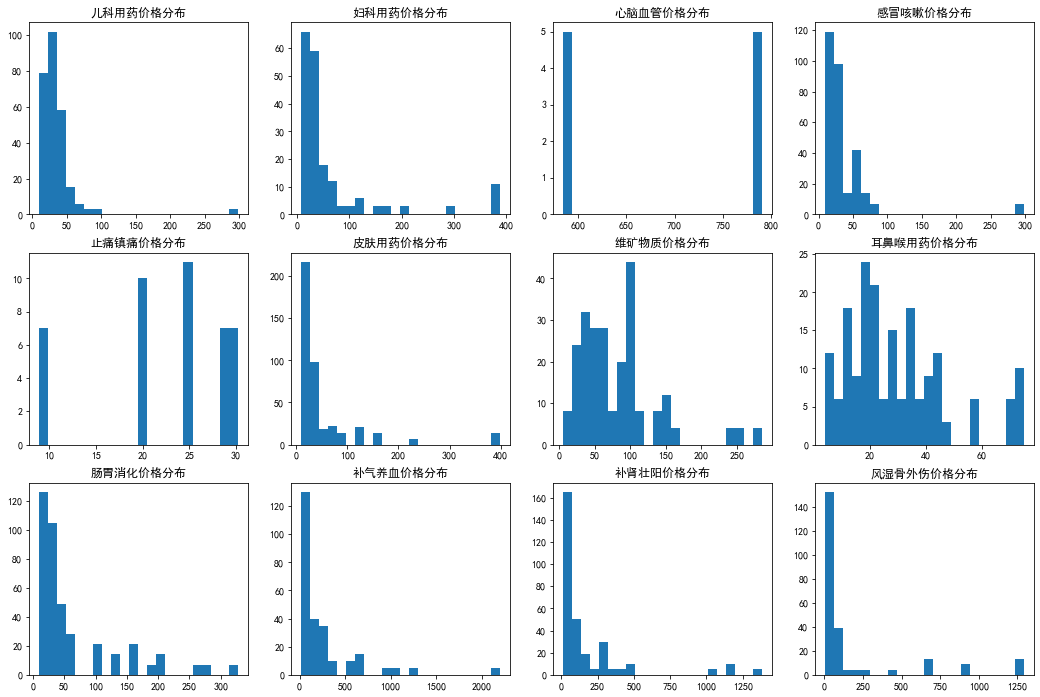

In [41]:
fig,subplot_arr = plt.subplots(3,4,figsize=(18,12))
grouped = df_obj.groupby('category')
c = 0
for name,value in grouped:
    i = c // 4
    j = c % 4
    subplot_arr[i,j].set_title(name+'价格分布')
    subplot_arr[i,j].hist(df_obj[df_obj['category']==name]['price'],bins=22)
    c+=1
plt.savefig('./images/img4.jpg')
plt.show()
    

## 各个类别下销量最佳的药品分析

In [42]:
ser_max_nums = df_obj.groupby('category').max()
print(ser_max_nums[['name','nums']])

                      name    nums
category                          
儿科用药              龙牡龙牡壮骨颗粒  510000
妇科用药                金鸡金鸡胶囊  190000
心脑血管               天草丹参保心茶   51000
感冒咳嗽          香雪橘红痰咳液（无糖型）  850000
止痛镇痛                芬必得24粒  170000
皮肤用药             采乐2%*50ml  320000
维矿物质      钙尔奇碳酸钙维D3元素片100片  650000
耳鼻喉用药        雷诺考特32ug*120喷  250000
肠胃消化              马应龙麝香痔疮膏  620000
补气养血       青春宝抗衰老片80片*6瓶简装  280000
补肾壮阳        阿房宫虫草双参酒 500ml  840000
风湿骨外伤             颈复康颈复康颗粒  150000


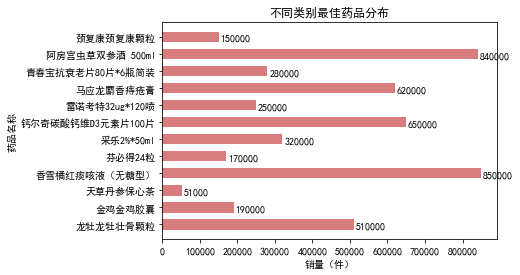

In [46]:
fig,ax = plt.subplots(1)
ax.set_title('不同类别最佳药品分布')
bar_height = 0.6
y = list(ser_max_nums['name'])
ax.barh(y=np.arange(len(y)),width=ser_max_nums['nums'],height=bar_height,color='indianred',alpha=0.8)
# 在柱形图上显示具体数值
for ypos,x in enumerate(ser_max_nums['nums']):
    ax.text(x+5000,ypos-bar_height/2,'%s'%x,ha='left',va='bottom')
ax.set_xlabel('销量（件）')
ax.set_ylabel('药品名称')
# 设置y轴刻度
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y)
plt.savefig('./images/img5.jpg')
plt.show()

## 各个类别销售额最佳药品分析

In [47]:
df_obj['amount'] = df_obj['price'] * df_obj['nums']
print(df_obj.iloc[1,:])

category                                   补肾壮阳
title       汇仁 肾宝片 126片 肾虚肾亏补肾中药肾气丸滋阴壮阳 推荐2盒1疗程
price                                       322
nums                                     400000
name                                汇仁0.7g*126片
brand                                        汇仁
symptoms                                   畏寒怕冷
type                                   肾阳虚，阴阳亏虚
amount                                1.288e+08
Name: 1, dtype: object


In [48]:
df_max_amount = df_obj.groupby('category').max()
print(df_max_amount['name'],df_max_amount['amount'])

category
儿科用药             龙牡龙牡壮骨颗粒
妇科用药               金鸡金鸡胶囊
心脑血管              天草丹参保心茶
感冒咳嗽         香雪橘红痰咳液（无糖型）
止痛镇痛               芬必得24粒
皮肤用药            采乐2%*50ml
维矿物质     钙尔奇碳酸钙维D3元素片100片
耳鼻喉用药       雷诺考特32ug*120喷
肠胃消化             马应龙麝香痔疮膏
补气养血      青春宝抗衰老片80片*6瓶简装
补肾壮阳       阿房宫虫草双参酒 500ml
风湿骨外伤            颈复康颈复康颗粒
Name: name, dtype: object category
儿科用药      34680000.0
妇科用药      27099800.0
心脑血管      40290000.0
感冒咳嗽      22720000.0
止痛镇痛       5134000.0
皮肤用药      33540000.0
维矿物质     185250000.0
耳鼻喉用药     18750000.0
肠胃消化     104640000.0
补气养血     615440000.0
补肾壮阳     155480000.0
风湿骨外伤     50730000.0
Name: amount, dtype: float64


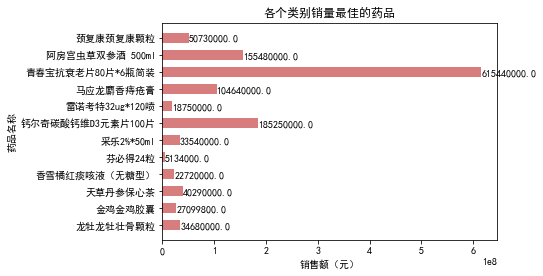

In [51]:
fig,ax = plt.subplots(1)
ax.set_title('各个类别销量最佳的药品')
bar_height = 0.6
y = list(df_max_amount['name'])
ax.barh(y=np.arange(len(y)),width=df_max_amount['amount'],height=bar_height,color='indianred',alpha=0.8)
for ypos,x in enumerate(df_max_amount['amount']):
    ax.text(x+5000,ypos-bar_height/2,'%s'%x,ha='left',va='bottom')
ax.set_xlabel('销售额（元）')
ax.set_ylabel('药品名称')
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y)
plt.savefig('./images/img_6.jpg')
plt.show()

## 不同类别药品销售额分析

category
儿科用药     7.717087e+08
妇科用药     4.884206e+08
心脑血管     2.541000e+08
感冒咳嗽     1.888677e+09
止痛镇痛     1.051134e+08
皮肤用药     1.977697e+09
维矿物质     6.195001e+09
耳鼻喉用药    3.511291e+08
肠胃消化     3.883154e+09
补气养血     9.227458e+09
补肾壮阳     5.234041e+09
风湿骨外伤    1.327018e+09
Name: amount, dtype: float64


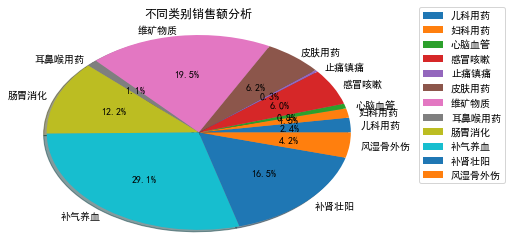

In [53]:
ser_amount = df_obj.groupby('category')['amount'].sum()
print(ser_amount)
fig,ax = plt.subplots(1)
ax.set_title('不同类别销售额分析')
ax.pie(ser_amount,labels=ser_amount.index,autopct='%3.1f%%',labeldistance=1.07,shadow=True,radius=1)
plt.legend(loc=1,bbox_to_anchor=(1.43,1.1))
plt.axis('tight')
plt.savefig('./images/img_7.jpg')
plt.show()

## 品牌药品销售额分析

In [62]:
df_amount_by_brand = df_obj.groupby('brand').sum()
# print(df_amount_by_brand)
# 降序排序
df_amount_by_brand = df_amount_by_brand.sort_values(by='amount',ascending=False)
df_amount_by_brand = df_amount_by_brand[df_amount_by_brand['amount']>=100000000]
print(df_amount_by_brand)

                       price      nums        amount
brand                                               
东阿阿胶                31250.00  11249500  7.111936e+09
同仁堂（TRT）            23277.50  47815100  2.302364e+09
汇仁                  25014.70   8999500  2.137433e+09
爱乐维（Menevit）         3648.00  10408400  1.961727e+09
迪巧                   2829.20  15400000  1.556060e+09
舒尔佳                  4532.50   8960000  1.450400e+09
钙尔奇（Caltrate）        2388.00  15120000  1.289520e+09
九芝堂                 10700.10  13484000  1.207311e+09
999                  3086.65  39933000  8.349385e+08
盘龙云海                 3402.00   4410000  7.144200e+08
敖东                   2665.00   5250000  5.596500e+08
21金维他                1747.20   5600000  4.892160e+08
慢严舒柠（MINT）           1917.30   8750000  4.793250e+08
蔓迪                   1778.00   3640000  4.622800e+08
陈李济                  8279.00    667400  4.612660e+08
马应龙                   726.60  21700000  4.504920e+08
福胶                   9530.00    675000  4.2885

(41, 3)


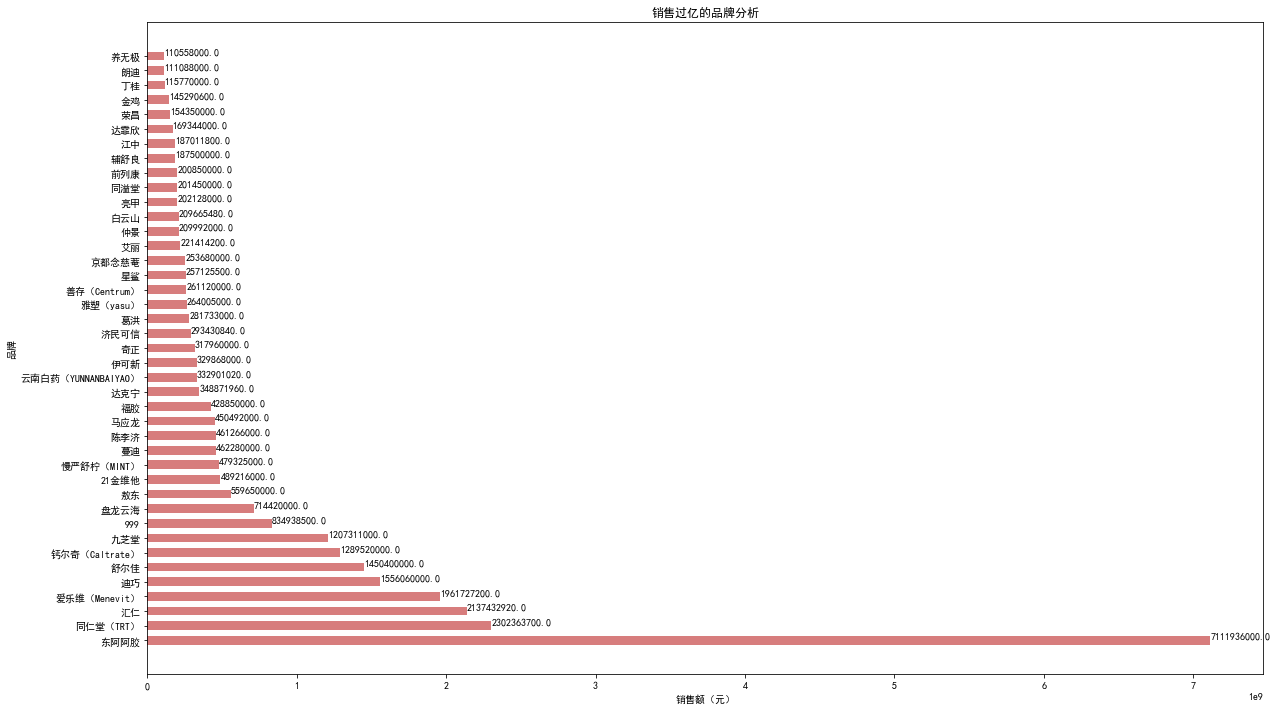

In [64]:
print(df_amount_by_brand.shape)
fig,ax = plt.subplots(1,figsize=(20,12))
ax.set_title('销售过亿的品牌分析')
bar_height = 0.6
y = list(df_amount_by_brand.index)
ax.barh(y=np.arange(len(y)),width=df_amount_by_brand['amount'],height=bar_height,color='indianred',alpha=0.8)
for ypos,x in enumerate(df_amount_by_brand['amount']):
    ax.text(x+5000,ypos,'%s'%x,ha='left',va='bottom')
ax.set_xlabel('销售额（元）')
ax.set_ylabel('品牌')
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y)
plt.savefig('./images/img_8.jpg')
plt.show()